|--- cylinders <= 5.50
|   |--- mpg <= 30.95
|   |   |--- weight <= 1947.50
|   |   |   |--- class: europe
|   |   |--- weight >  1947.50
|   |   |   |--- weight <= 2901.50
|   |   |   |   |--- weight <= 2379.50
|   |   |   |   |   |--- class: japan
|   |   |   |   |--- weight >  2379.50
|   |   |   |   |   |--- class: usa
|   |   |   |--- weight >  2901.50
|   |   |   |   |--- class: europe
|   |--- mpg >  30.95
|   |   |--- class: japan
|--- cylinders >  5.50
|   |--- class: usa



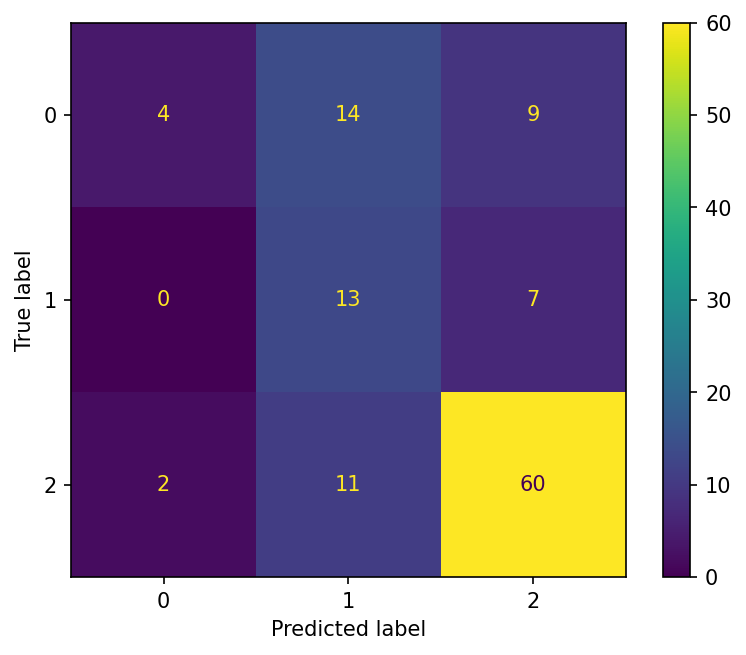

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
mpg = pd.read_csv('mpg.csv')
plt.rcParams['figure.dpi'] = 150

# Create a dataframe X containing cylinders, weight, and mpg
X = mpg[['cylinders', 'weight', 'mpg']]

# Create a dataframe y containing origin
y = mpg['origin']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Initialize the Decision Tree Classifier with max_leaf_nodes=6
DTC = DecisionTreeClassifier(max_leaf_nodes=6, random_state=123)

# Fit the tree to the training data
DTC.fit(X_train, y_train)

# Print the text summary of the tree
DTC_tree = export_text(DTC, feature_names=list(X.columns))
print(DTC_tree)

# Make predictions for the test data
y_pred = DTC.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
ConfusionMatrixDisplay(cm).plot()
plt.savefig('confMatrix.png')
plt.show()
